Morphological transformations are a powerful set of image processing operations in OpenCV, mainly used for preprocessing and postprocessing tasks like noise removal, object detection, and shape analysis.

 What Are Morphological Transformations?<br>
Morphological transformations are operations that process images based on shapes. They typically work on binary images (black and white) and use a kernel (structuring element) to probe and transform the image.

In [34]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import math

In [13]:
img = cv2.imread('E:\Abhinav\Mystic\Machine Learning\OpenCV\images\cross.jpg', 0) 
_,mask = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3),np.uint8)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\abhi1\AppData\Local\Temp\ipykernel_14288\3704655686.py:1: SyntaxWarning: invalid escape sequence '\A'
  img = cv2.imread('E:\Abhinav\Mystic\Machine Learning\OpenCV\images\cross.jpg', 0)


1. Erosion<br>
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
<br>
So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

In [ ]:
erosion = cv2.erode(mask,kernel,iterations=2)


2. Dilation<br>
It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

In [16]:
dilation = cv2.dilate(erosion,kernel,iterations=2)

3. Opening<br>
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

In [18]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

4. Closing<br>
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [21]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

5. Morphological Gradient<br>
It is the difference between dilation and erosion of an image.This gives the border of the image as dilation expands the white region and erosing shrinks the white region, resulting in the boundaries 

In [25]:
gradient = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernel)

6. Top Hat<br>
It is the difference between input image and Opening of the image.This gives the white region which was removed in the Opening process in the erosion process 

In [27]:
top_hat = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernel)

7. Black Hat<br>
It is the difference between the closing of the input image and input image.This will give the regions which would be filled by closing

In [29]:
black_hat = cv2.morphologyEx(mask,cv2.MORPH_BLACKHAT,kernel)

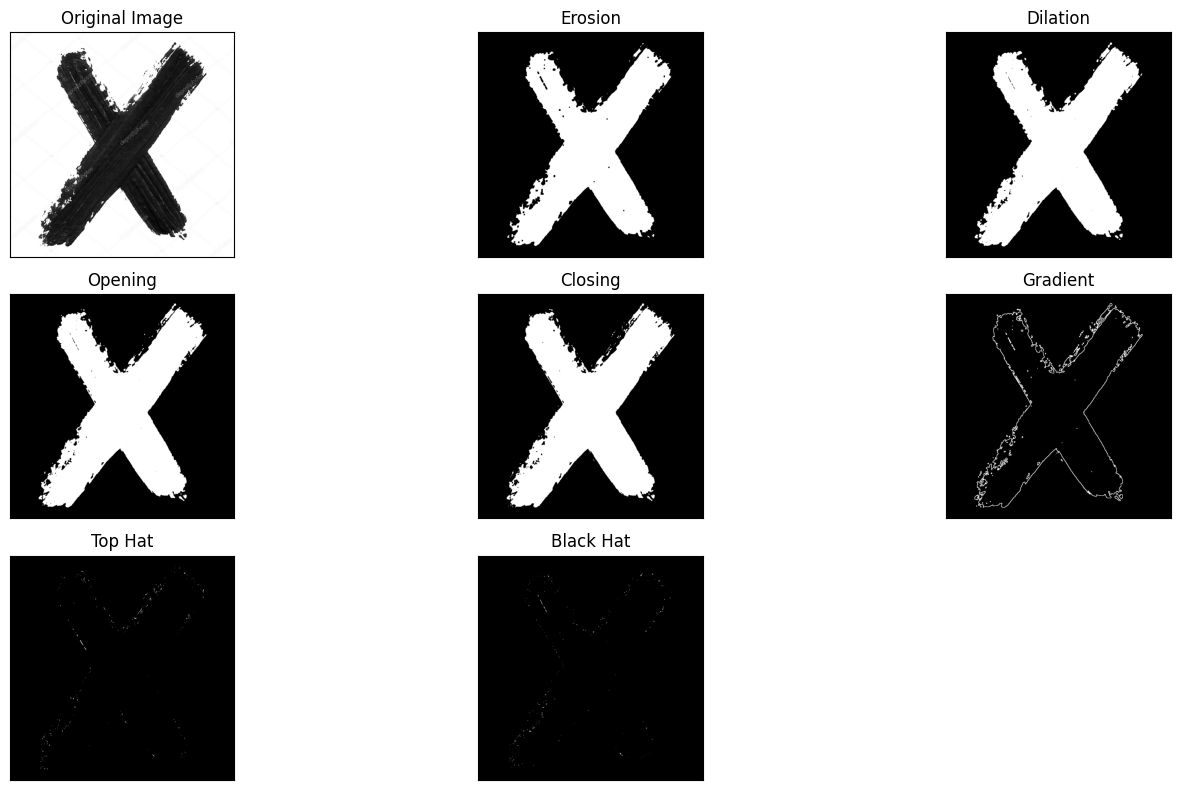

In [ ]:

title = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Top Hat', 'Black Hat']
images = [img, erosion, dilation, opening, closing, gradient, top_hat, black_hat]

n = len(images)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

plt.figure(figsize=(15, 8))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()